In [1]:
import pynucastro as pyna
reaclibrary = pyna.ReacLibLibrary()
#tabular_lib = pyna.TabularLibrary() #Useless

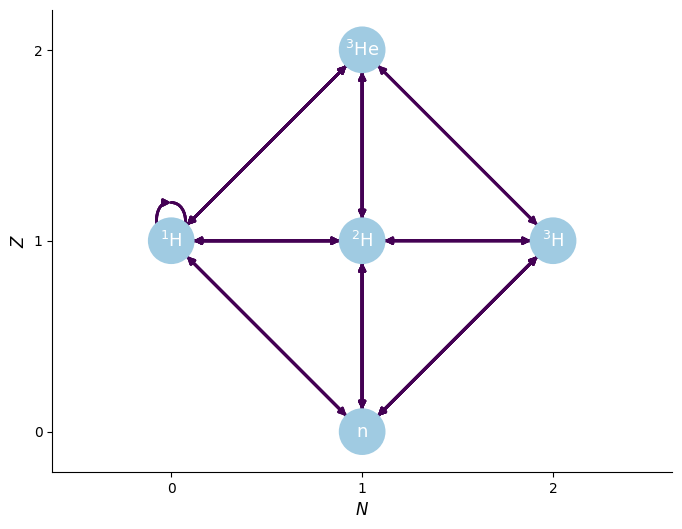

In [2]:
all_nuclei = ["p","n", "h2", "h3", "he3", "he4","Li6","Li7","Be7"]#,'Li8']
bbn_library = reaclibrary.linking_nuclei(all_nuclei, with_reverse=True)#with reverse lader ikke til at gøre noget
bbn_network = pyna.networks.PythonNetwork(libraries=bbn_library)
fig = bbn_network.plot()

In [3]:
print(bbn_network)


n ⟶ p + e⁻ + 𝜈
H3 ⟶ He3 + e⁻ + 𝜈
He3 + e⁻ ⟶ H3 + 𝜈
H2 ⟶ n + p
H3 ⟶ n + H2
He3 ⟶ p + H2
He4 ⟶ n + He3
He4 ⟶ p + H3
He4 ⟶ H2 + H2
n + p ⟶ H2 + 𝛾
p + p ⟶ H2 + e⁺ + 𝜈
p + p + e⁻ ⟶ H2 + 𝜈
H2 + n ⟶ H3 + 𝛾
H2 + p ⟶ He3 + 𝛾
H2 + H2 ⟶ He4 + 𝛾
H3 + p ⟶ He4 + 𝛾
He3 + n ⟶ He4 + 𝛾
He3 + p ⟶ He4 + e⁺ + 𝜈
H2 + H2 ⟶ n + He3
H2 + H2 ⟶ p + H3
H3 + p ⟶ n + He3
H3 + p ⟶ H2 + H2
H3 + H2 ⟶ n + He4
He3 + n ⟶ p + H3
He3 + n ⟶ H2 + H2
He3 + H2 ⟶ p + He4
He3 + H3 ⟶ H2 + He4
n + He4 ⟶ H2 + H3
p + He4 ⟶ H2 + He3
H2 + He4 ⟶ H3 + He3
H2 + p ⟶ n + p + p
H3 + H3 ⟶ n + n + He4
He3 + H3 ⟶ n + p + He4
He3 + He3 ⟶ p + p + He4
n + p + p ⟶ p + H2
n + n + He4 ⟶ H3 + H3
n + p + He4 ⟶ H3 + He3
p + p + He4 ⟶ He3 + He3



In [4]:
n2p=bbn_library.get_rate('be7__li7__weak__electron_capture')
#bbn_network.add_rate(rate)


In [5]:
from copy import deepcopy

new_obj = deepcopy(n2p)

dir(new_obj)
new_obj.function_string_py()

NameError: name 'n2p' is not defined

In [ ]:
print(bbn_network.network_overview())

n
  consumed by:
     n ⟶ p + e⁻ + 𝜈
     n + p ⟶ H2 + 𝛾
     H2 + n ⟶ H3 + 𝛾
     He3 + n ⟶ He4 + 𝛾
     Li6 + n ⟶ Li7 + 𝛾
     He3 + n ⟶ p + H3
     He3 + n ⟶ H2 + H2
     n + He4 ⟶ H2 + H3
     Li6 + n ⟶ He4 + H3
     Be7 + n ⟶ p + Li7
     Be7 + n ⟶ H2 + Li6
     Be7 + n ⟶ He4 + He4
     n + p + He4 ⟶ Li6 + 𝛾
     n + p + p ⟶ p + H2
     n + n + He4 ⟶ H3 + H3
     n + p + He4 ⟶ H3 + He3
     n + He4 + He4 ⟶ H2 + Li7
     n + n + He4 + He4 ⟶ H3 + Li7
     n + p + He4 + He4 ⟶ He3 + Li7
     n + p + He4 + He4 ⟶ H3 + Be7
  produced by:
     H2 ⟶ n + p
     H3 ⟶ n + H2
     He4 ⟶ n + He3
     Li7 ⟶ n + Li6
     Li6 ⟶ n + p + He4
     H2 + H2 ⟶ n + He3
     H3 + p ⟶ n + He3
     H3 + H2 ⟶ n + He4
     H3 + He4 ⟶ n + Li6
     He4 + He4 ⟶ n + Be7
     Li6 + H2 ⟶ n + Be7
     Li7 + p ⟶ n + Be7
     H2 + p ⟶ n + p + p
     H3 + H3 ⟶ n + n + He4
     He3 + H3 ⟶ n + p + He4
     Li7 + H2 ⟶ n + He4 + He4
     Li7 + H3 ⟶ n + n + He4 + He4
     Li7 + He3 ⟶ n + p + He4 + He4
     Be7 + H3 ⟶ n + p 

In [ ]:
bbn_network.validate(reaclibrary)



validation: missing Li7 + H2 ⟶ p + Li8 as alternative to Li7 + H2 ⟶ n + He4 + He4 (Q = -0.19103 MeV).
validation: missing Li7 + H3 ⟶ H2 + Li8 as alternative to Li7 + H3 ⟶ n + n + He4 + He4 (Q = -4.22462 MeV).
validation: missing Li7 + H3 ⟶ n + Be9 as alternative to Li7 + H3 ⟶ n + n + He4 + He4 (Q = 10.4376 MeV).


True

In [ ]:
comp = pyna.Composition(bbn_network.get_nuclei())
comp.set_solar_like()
re = pyna.Explorer(bbn_network, comp)
re.explore()

interactive(children=(FloatSlider(value=4.0, description='logrho', max=6.0, min=2.0), FloatSlider(value=8.0, d…

In [ ]:
#bbn_network.write_network("bbn2_test_integrate.py")
#%cat BBN_test_integrate.py

In [7]:
import pynucastro as pyna
reaclibrary = pyna.ReacLibLibrary()
all_nuclei = ["p","n", "h2", "h3", "he3", "he4","Li6","Li7","Be7"]
bbn_library = reaclibrary.linking_nuclei(all_nuclei)
bbn_network = pyna.networks.PythonNetwork(libraries=bbn_library)
bbn_network.write_network("bbn2_test_integrate.py")